In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt
import seaborn as sns

from catboost import CatBoostClassifier

In [2]:
df = pd.read_excel(open('./hack/dataset_train.xlsx', 'rb'), sheet_name='Sheet1')
df

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2
...,...,...,...,...,...,...,...
31378,d71f9db8-f93b-4cab-89ce-5d52a6627034,2,3,4,"[-35, -20, -3, 20, 37, 53, 65, 83, 93, 21, -80...","[241, 240, 244, 242, 248, 247, 239, 217, 203, ...",1
31379,dc61b9b4-2a5d-4a4e-bbbf-ffe039a5aee9,0,1,5,"[-550, -540, -510, -450, -350, -262, -161, -59...","[-1060, -1055, -1038, -1003, -940, -881, -812,...",1
31380,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[98, 95, 126, 206, 207, 62, -78, -83, -7, 132,...","[-203, -203, -211, -241, -247, -192, -123, -10...",2
31381,90b19f5e-5be0-4f38-a0e3-06482573effe,0,1,9,"[-365, -264, -184, -58, 102, 263, 419, 598, 29...","[-10, 40, 87, 180, 304, 431, 558, 706, 483, 14...",1


In [3]:
func = lambda x: eval(x)

df['Data'] = df['Data'].apply(func)
df['Data_2'] = df['Data_2'].apply(func)
df

,Filename,Test_index,Presentation,Question,Data,Data_2,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[298, 296, 2, -455, -703, -596, -262, -44, 28,...","[-918, -1078, -450, 640, 1503, 1635, 1083, 589...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[99, 75, -228, -588, -583, -465, -394, -363, -...","[499, 494, 520, 577, 595, 584, 575, 567, 561, ...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[-369, -543, -644, -670, -636, -586, -524, -44...","[263, 444, 548, 576, 539, 485, 419, 331, 266, ...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[-6, -32, -152, -253, -275, -246, -211, -197, ...","[2, 138, 782, 1314, 1471, 1354, 1183, 1127, 10...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[165, 178, 190, 202, 218, 230, 200, 121, 71, 8...","[-722, -711, -700, -686, -669, -665, -712, -79...",2
...,...,...,...,...,...,...,...
31378,d71f9db8-f93b-4cab-89ce-5d52a6627034,2,3,4,"[-35, -20, -3, 20, 37, 53, 65, 83, 93, 21, -80...","[241, 240, 244, 242, 248, 247, 239, 217, 203, ...",1
31379,dc61b9b4-2a5d-4a4e-bbbf-ffe039a5aee9,0,1,5,"[-550, -540, -510, -450, -350, -262, -161, -59...","[-1060, -1055, -1038, -1003, -940, -881, -812,...",1
31380,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[98, 95, 126, 206, 207, 62, -78, -83, -7, 132,...","[-203, -203, -211, -241, -247, -192, -123, -10...",2
31381,90b19f5e-5be0-4f38-a0e3-06482573effe,0,1,9,"[-365, -264, -184, -58, 102, 263, 419, 598, 29...","[-10, 40, 87, 180, 304, 431, 558, 706, 483, 14...",1


#### Балансировка

In [4]:
class_0 = df[df['Class_label'] == 0].index.tolist()
class_1 = df[df['Class_label'] == 1].index.tolist()
class_2 = df[df['Class_label'] == 2].index.tolist()

multi_class_1 = int(np.mean([len(class_0), len(class_2)]))
class_1 = class_1[:multi_class_1]

balanced_idx = class_0 + class_1 + class_2
balanced_idx = sorted(balanced_idx)

try_df = df.loc[balanced_idx,:].reset_index(drop=True)

In [5]:
func = lambda x: 1 if len(x)>0 else np.NAN

try_df['check'] = try_df['Data'].apply(func)
try_df = try_df.dropna()
try_df['check'] = try_df['Data_2'].apply(func)
try_df = try_df.dropna().drop(['check'], axis=1).reset_index(drop=True)

### Разбиевние на 2 датасета по сигналам

In [6]:
photo = try_df.drop(['Data_2'], axis=1)
piezo = try_df.drop(['Data'], axis=1)

#### Нормализация

In [7]:
scaler_photo = MinMaxScaler()
flag_photo = True
for i, row in photo.iterrows():
    try:
        if flag_photo:
            photo.loc[i,'Data'] = scaler_photo.fit_transform(np.array(row['Data']).reshape(-1,1))
            flag_photo = False
        else:
            photo.loc[i,'Data'] = scaler_photo.transform(np.array(row['Data']).reshape(-1,1))
    except:
        print('len 0')



scaler_piezo = MinMaxScaler()
flag_piezo = True
for i, row in piezo.iterrows():
    try:
        if flag_piezo:
            piezo.loc[i,'Data_2'] = scaler_piezo.fit_transform(np.array(row['Data_2']).reshape(-1,1))
            flag_piezo = False
        else:
            piezo.loc[i,'Data_2'] = scaler_piezo.transform(np.array(row['Data_2']).reshape(-1,1))
    except:
        print('len 0')


In [8]:
photo

,Filename,Test_index,Presentation,Question,Data,Class_label
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2
...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0
19630,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[0.7614379084967321, 0.7589869281045751, 0.784...",2


In [9]:
all_df = photo
all_df['Data_2'] = piezo['Data_2']
all_df

,Filename,Test_index,Presentation,Question,Data,Class_label,Data_2
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1,"[0.2844805689611379, 0.24384048768097533, 0.40..."
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0,"[0.6443992887985776, 0.6431292862585725, 0.649..."
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2,"[0.5844551689103378, 0.6304292608585216, 0.656..."
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1,"[0.5181610363220726, 0.5527051054102108, 0.716..."
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2,"[0.334264668529337, 0.3370586741173482, 0.3398..."
...,...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2,"[0.365760731521463, 0.3721107442214884, 0.3815..."
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2,"[0.45694691389382774, 0.4658369316738633, 0.47..."
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0,"[0.49555499110998213, 0.4963169926339852, 0.49..."
19630,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[0.7614379084967321, 0.7589869281045751, 0.784...",2,"[0.4660909321818643, 0.4660909321818643, 0.464..."


#### Перцентили

In [10]:
percent_df = all_df.copy()
quant_list = [0.01, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99]

def _quant(row: pd.Series, quant=None):
    quant = np.quantile(row, quant)
    return quant


for q in quant_list:
    try:
        percent_df[f'Data_q_{q}'] = percent_df['Data'].apply(_quant, quant=q)
        percent_df[f'Data2_q_{q}'] = percent_df['Data_2'].apply(_quant, quant=q)
    except:
        print('подлива')


In [11]:
percent_df

,Filename,Test_index,Presentation,Question,Data,Class_label,Data_2,Data_q_0.01,Data2_q_0.01,Data_q_0.2,...,Data_q_0.7,Data2_q_0.7,Data_q_0.75,Data2_q_0.75,Data_q_0.8,Data2_q_0.8,Data_q_0.9,Data2_q_0.9,Data_q_0.99,Data2_q_0.99
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1,"[0.2844805689611379, 0.24384048768097533, 0.40...",0.037712,0.031811,0.457680,...,0.851144,0.624714,0.870915,0.655131,0.891340,0.696317,0.932435,0.798095,0.981250,0.969187
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0,"[0.6443992887985776, 0.6431292862585725, 0.649...",0.197353,0.634592,0.413399,...,0.694199,0.660147,0.728758,0.661735,0.751144,0.663703,0.837745,0.668072,0.953333,0.674750
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2,"[0.5844551689103378, 0.6304292608585216, 0.656...",0.059992,0.301770,0.352288,...,0.962092,0.547701,1.002451,0.567564,1.041993,0.593244,1.119608,0.640843,1.217819,0.675525
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1,"[0.5181610363220726, 0.5527051054102108, 0.716...",0.357026,0.192098,0.473039,...,0.625163,0.824308,0.641748,0.862332,0.657026,0.884785,0.701797,0.958217,0.794518,1.037592
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2,"[0.334264668529337, 0.3370586741173482, 0.3398...",0.452574,0.251250,0.540850,...,0.790523,0.320523,0.809845,0.327915,0.834967,0.335687,0.864134,0.344806,0.919297,0.356828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2,"[0.365760731521463, 0.3721107442214884, 0.3815...",0.602761,0.311293,0.647876,...,0.705310,0.398781,0.710172,0.401575,0.720752,0.408788,0.740359,0.422860,0.763930,0.441100
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2,"[0.45694691389382774, 0.4658369316738633, 0.47...",0.558962,0.427780,0.609641,...,0.721650,0.499619,0.735703,0.502223,0.750980,0.507747,0.791422,0.519177,0.838734,0.535588
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0,"[0.49555499110998213, 0.4963169926339852, 0.49...",0.391855,0.451811,0.513562,...,0.718954,0.503759,0.738154,0.505779,0.754085,0.508509,0.780310,0.515926,0.850531,0.532393
19630,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[0.7614379084967321, 0.7589869281045751, 0.784...",2,"[0.4660909321818643, 0.4660909321818643, 0.464...",0.415670,0.435839,0.588399,...,0.783742,0.507137,0.802288,0.511113,0.825980,0.514402,0.857925,0.525578,0.911070,0.543165


#### Статистики

In [12]:
stats_df = percent_df.copy()
for f in [np.mean, np.max, np.min, np.median]:
    try:
        stats_df[f'Data_{f}'] = stats_df['Data'].apply(f)
        stats_df[f'Data2_{f}'] = stats_df['Data_2'].apply(f)
    except:
        print('подлива')



In [13]:
prep_df = stats_df.astype({
    'Test_index': 'category',
    'Presentation': 'category',
    'Question': 'category'
})
# prep_df = stats_df

#### Спектральный анализ

In [14]:
N = 10

def abs_amplitude(row: pd.Series):
    """
    Модуль амплитуды
    :param row:
    :return:
    """
    F=np.fft.rfft(row, n=None, axis=-1)
    A=[((F[i].real)**2+(F[i].imag)**2)**0.5 for i in np.arange(0,N,1)]
    return A


def phase(row: pd.Series):
    """
    Фаза
    :param row:
    :param F: прямое преобразование Фурье в частотную область
    :return:
    """
    F=np.fft.rfft(row, n=None, axis=-1)
    arg=[]
    for i in np.arange(0,N,1):
         if F[i].imag!=0:
             t=(-np.tanh((F[i].real)/(F[i].imag)))
             arg.append(t)
         else:
             arg.append(np.pi/2)
    return arg


In [15]:
prep_df['data_apm'] = prep_df['Data'].apply(abs_amplitude)
prep_df['data_2_apm'] = prep_df['Data_2'].apply(abs_amplitude)

In [16]:
prep_df['data_phase'] = prep_df['Data'].apply(phase)
prep_df['data_2_phase'] = prep_df['Data_2'].apply(phase)

In [17]:
prep_df

,Filename,Test_index,Presentation,Question,Data,Class_label,Data_2,Data_q_0.01,Data2_q_0.01,Data_q_0.2,...,Data_<function amax at 0x103e6eee0>,Data2_<function amax at 0x103e6eee0>,Data_<function amin at 0x103e720d0>,Data2_<function amin at 0x103e720d0>,Data_<function median at 0x1040e4f70>,Data2_<function median at 0x1040e4f70>,data_apm,data_2_apm,data_phase,data_2_phase
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1,"[0.2844805689611379, 0.24384048768097533, 0.40...",0.037712,0.031811,0.457680,...,1.000000,1.000000,0.000000,0.000000,0.732026,0.490475,"[160.05555555555554, 12.402062376856303, 3.747...","[117.23698247396493, 21.291776229681016, 5.755...","[1.5707963267948966, -0.6582377163794724, -0.3...","[1.5707963267948966, -0.4770207769647849, -0.8..."
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0,"[0.6443992887985776, 0.6431292862585725, 0.649...",0.197353,0.634592,0.413399,...,0.976307,0.677673,0.160131,0.633477,0.577206,0.654305,"[139.9011437908497, 14.078677652476395, 2.3899...","[157.0551181102362, 0.945985556580717, 0.09907...","[1.5707963267948966, 0.06997597857263754, -0.5...","[1.5707963267948966, -0.14078150305665652, -0...."
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2,"[0.5844551689103378, 0.6304292608585216, 0.656...",0.059992,0.301770,0.352288,...,1.242647,0.681483,0.016340,0.298705,0.756944,0.479045,"[167.10049019607845, 53.24332910482046, 4.9815...","[114.34975869951738, 17.688262887510827, 1.406...","[1.5707963267948966, 0.625064572045819, 0.9994...","[1.5707963267948966, 0.975668054666783, -0.977..."
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1,"[0.5181610363220726, 0.5527051054102108, 0.716...",0.357026,0.192098,0.473039,...,0.814542,1.037592,0.324346,0.146050,0.571487,0.689992,"[136.78349673202615, 10.720137796354273, 3.015...","[162.56388112776222, 29.496323165103107, 5.751...","[1.5707963267948966, -0.12398231809731243, 0.2...","[1.5707963267948966, -0.07040713472090139, 0.9..."
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2,"[0.334264668529337, 0.3370586741173482, 0.3398...",0.452574,0.251250,0.540850,...,0.926471,0.358141,0.441176,0.249428,0.676879,0.299975,"[163.84313725490196, 21.122971108186647, 6.103...","[72.85902971805942, 4.110642347790821, 1.69106...","[1.5707963267948966, 0.0742722157172115, 0.055...","[1.5707963267948966, 0.12964104491346798, 0.11..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2,"[0.365760731521463, 0.3721107442214884, 0.3815...",0.602761,0.311293,0.647876,...,0.771242,0.443231,0.595588,0.305055,0.684641,0.381382,"[163.9607843137255, 0.3974478302289149, 4.9573...","[91.19126238252476, 0.42151446590751235, 2.992...","[1.5707963267948966, 0.9814728409267546, -0.03...","[1.5707963267948966, -0.49911819909107147, 0.2..."
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2,"[0.45694691389382774, 0.4658369316738633, 0.47...",0.558962,0.427780,0.609641,...,0.845588,0.542545,0.553922,0.425705,0.689951,0.484760,"[164.57107843137254, 8.628342662049107, 3.0245...","[115.9781559563119, 2.050042826265615, 0.87680...","[1.5707963267948966, 0.2909380384633038, -0.38...","[1.5707963267948966, 0.37807006631961365, -0.1..."
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0,"[0.49555499110998213, 0.4963169926339852, 0.49...",0.391855,0.451811,0.513562,...,0.866013,0.538735,0.375000,0.449327,0.677696,0.495047,"[154.20588235294116, 18.776366634842347, 4.785...","[117.96393192786385, 0.5207543277763816, 2.083...","[1.5707963267948966, -0.9999999999996836, 0.99...","[1.5707963267948966, -0.9

#### Амплитуда и фаза как фичи

In [18]:
sensor_1 = prep_df['data_2_apm'].apply(pd.Series)
sensor_1.columns = [f'data_2_amp_{i}' for i in range(sensor_1.shape[1])]
sensor_2 = prep_df['data_2_phase'].apply(pd.Series)
sensor_2.columns = [f'data_2_phase_{i}' for i in range(sensor_2.shape[1])]

sensor_3 = prep_df['data_apm'].apply(pd.Series)
sensor_3.columns = [f'data_amp_{i}' for i in range(sensor_3.shape[1])]
sensor_4 = prep_df['data_phase'].apply(pd.Series)
sensor_4.columns = [f'data_phase_{i}' for i in range(sensor_4.shape[1])]

sensor_df = pd.concat([prep_df, sensor_1, sensor_2, sensor_3, sensor_4], axis=1)
sensor_df

,Filename,Test_index,Presentation,Question,Data,Class_label,Data_2,Data_q_0.01,Data2_q_0.01,Data_q_0.2,...,data_phase_0,data_phase_1,data_phase_2,data_phase_3,data_phase_4,data_phase_5,data_phase_6,data_phase_7,data_phase_8,data_phase_9
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1,"[0.2844805689611379, 0.24384048768097533, 0.40...",0.037712,0.031811,0.457680,...,1.570796,-0.658238,-0.328028,0.999994,0.793554,0.798608,-0.444473,0.134554,-0.706434,0.371564
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0,"[0.6443992887985776, 0.6431292862585725, 0.649...",0.197353,0.634592,0.413399,...,1.570796,0.069976,-0.516677,-1.000000,-0.330987,-0.209090,0.138578,0.038119,0.301147,-0.214457
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2,"[0.5844551689103378, 0.6304292608585216, 0.656...",0.059992,0.301770,0.352288,...,1.570796,0.625065,0.999458,0.999695,0.499866,0.890899,1.000000,0.999073,0.999150,0.857068
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1,"[0.5181610363220726, 0.5527051054102108, 0.716...",0.357026,0.192098,0.473039,...,1.570796,-0.123982,0.211319,-0.073549,-0.454601,-1.000000,0.600104,-0.445401,-0.065110,-0.308187
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2,"[0.334264668529337, 0.3370586741173482, 0.3398...",0.452574,0.251250,0.540850,...,1.570796,0.074272,0.055599,-0.138191,0.254776,0.154226,0.027021,0.302386,0.427470,0.433071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2,"[0.365760731521463, 0.3721107442214884, 0.3815...",0.602761,0.311293,0.647876,...,1.570796,0.981473,-0.036491,-0.996457,-0.232819,0.995351,-0.902661,0.961824,-0.127067,0.441802
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2,"[0.45694691389382774, 0.4658369316738633, 0.47...",0.558962,0.427780,0.609641,...,1.570796,0.290938,-0.387696,-0.156558,-0.162693,-0.208636,-0.253019,-0.647351,-0.745118,-0.879291
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0,"[0.49555499110998213, 0.4963169926339852, 0.49...",0.391855,0.451811,0.513562,...,1.570796,-1.000000,0.996266,-0.740711,0.057873,-0.323442,0.137349,-0.139383,0.223558,-0.557893
19630,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[0.7614379084967321, 0.7589869281045751, 0.784...",2,"[0.4660909321818643, 0.4660909321818643, 0.464...",0.415670,0.435839,0.588399,...,1.570796,-1.000000,-0.904590,-0.616876,0.002621,0.887753,0.089401,0.846103,-0.201902,0.012930


#### Метрики регрессии между сигналами вопросов в рамках группы и повторения

In [19]:
for i in sensor_df.Test_index.unique():
    test_idx = sensor_df[sensor_df['Test_index'] == i]
    for j in test_idx.Presentation.unique():
        pred_idx = test_idx[test_idx['Presentation'] == j]
        for k in pred_idx.Question.unique():
            que_idx = pred_idx[pred_idx['Question'] == k]
            idxs = que_idx.index
            r_val, mae_val, mse_val = [], [], []
            for id, val in enumerate(idxs):
                try:
                    value_1 = que_idx.loc[idxs[id], 'Data']
                    value_2 = que_idx.loc[idxs[id+1], 'Data']
                    r = r2_score(value_1, value_2)
                    mae = mean_absolute_error(value_1, value_2)
                    mse =mean_squared_error(value_1, value_2)

                    r_val.append(r)
                    mae_val.append(mae)
                    mse_val.append(mse)
                except:
                    print('exception')
            r_ds = np.mean(r_val)
            mae_ds = np.mean(mae_val)
            mse_ds = np.mean(mse_val)

            sensor_df.loc[idxs, 'r_ds'] = r_ds
            sensor_df.loc[idxs, 'mae_ds'] = mae_ds
            sensor_df.loc[idxs, 'mse_ds'] = mse_ds

exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception


/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception


/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception


/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception
exception


/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/196

In [20]:
metric_df = sensor_df.groupby(['Test_index', 'Presentation', 'Question'])['r_ds', 'mae_ds', 'mse_ds'].mean().reset_index()
sensor_df = sensor_df.drop(['r_ds', 'mae_ds', 'mse_ds'], axis=1)
metric_df

/var/folders/ty/77p5n8px0p3cs74k93m4jjxxbrwyrp/T/ipykernel_8575/2545948557.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  metric_df = sensor_df.groupby(['Test_index', 'Presentation', 'Question'])['r_ds', 'mae_ds', 'mse_ds'].mean().reset_index()


,Test_index,Presentation,Question,r_ds,mae_ds,mse_ds
0,0,1,0,-27990.029529,0.224658,0.098051
1,0,1,1,-540.406525,0.280293,0.196137
2,0,1,2,-698.764737,0.235357,0.103798
3,0,1,3,-2339.959864,0.274251,0.199734
4,0,1,4,-1630.101608,0.226655,0.096657
...,...,...,...,...,...,...
387,6,4,9,NaN,NaN,NaN
388,6,4,10,NaN,NaN,NaN
389,6,4,11,NaN,NaN,NaN
390,6,4,12,NaN,NaN,NaN


In [21]:
sensor_df = sensor_df.merge(metric_df, left_on = ['Test_index', 'Presentation', 'Question'],
                            right_on = ['Test_index', 'Presentation', 'Question'],
                            how='left')
sensor_df

,Filename,Test_index,Presentation,Question,Data,Class_label,Data_2,Data_q_0.01,Data2_q_0.01,Data_q_0.2,...,data_phase_3,data_phase_4,data_phase_5,data_phase_6,data_phase_7,data_phase_8,data_phase_9,r_ds,mae_ds,mse_ds
0,6ffe4933-3202-451b-ae6b-fee85cafc829,2,3,7,"[0.9248366013071896, 0.923202614379085, 0.6830...",1,"[0.2844805689611379, 0.24384048768097533, 0.40...",0.037712,0.031811,0.457680,...,0.999994,0.793554,0.798608,-0.444473,0.134554,-0.706434,0.371564,-18.970710,0.320202,0.204812
1,8de3189c-8e95-43a2-b6d2-743f097a57fb,0,1,0,"[0.7622549019607844, 0.7426470588235294, 0.495...",0,"[0.6443992887985776, 0.6431292862585725, 0.649...",0.197353,0.634592,0.413399,...,-1.000000,-0.330987,-0.209090,0.138578,0.038119,0.301147,-0.214457,-27990.029529,0.224658,0.098051
2,c74f5292-c8e8-4ef2-a963-7d035e5e3330,3,3,1,"[0.37990196078431376, 0.23774509803921567, 0.1...",2,"[0.5844551689103378, 0.6304292608585216, 0.656...",0.059992,0.301770,0.352288,...,0.999695,0.499866,0.890899,1.000000,0.999073,0.999150,0.857068,-4827.662916,0.238569,0.108735
3,c856d82f-917e-461c-a91f-5298926b8b31,0,3,6,"[0.6764705882352942, 0.6552287581699346, 0.557...",1,"[0.5181610363220726, 0.5527051054102108, 0.716...",0.357026,0.192098,0.473039,...,-0.073549,-0.454601,-1.000000,0.600104,-0.445401,-0.065110,-0.308187,-281.164591,0.309044,0.264171
4,00b38188-82ee-4f1d-9661-485338815751,3,1,2,"[0.8161764705882353, 0.8267973856209151, 0.836...",2,"[0.334264668529337, 0.3370586741173482, 0.3398...",0.452574,0.251250,0.540850,...,-0.138191,0.254776,0.154226,0.027021,0.302386,0.427470,0.433071,-7325.993762,0.231426,0.098359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,576b54c6-5bc1-4ec0-aac3-3555bde64476,3,3,7,"[0.6650326797385621, 0.6699346405228759, 0.678...",2,"[0.365760731521463, 0.3721107442214884, 0.3815...",0.602761,0.311293,0.647876,...,-0.996457,-0.232819,0.995351,-0.902661,0.961824,-0.127067,0.441802,-4134.060183,0.272979,0.139393
19628,0657f4ec-d8bd-4589-ac18-1e333388b405,2,1,2,"[0.6772875816993464, 0.690359477124183, 0.7066...",2,"[0.45694691389382774, 0.4658369316738633, 0.47...",0.558962,0.427780,0.609641,...,-0.156558,-0.162693,-0.208636,-0.253019,-0.647351,-0.745118,-0.879291,-3334.549232,0.239046,0.109863
19629,f53381e4-141b-4cdd-a12a-177796e0a44f,0,2,8,"[0.6911764705882353, 0.6977124183006537, 0.704...",0,"[0.49555499110998213, 0.4963169926339852, 0.49...",0.391855,0.451811,0.513562,...,-0.740711,0.057873,-0.323442,0.137349,-0.139383,0.223558,-0.557893,-171.994596,0.257350,0.125787
19630,373380a3-7e33-4213-ba1f-761ca348f6a8,3,2,7,"[0.7614379084967321, 0.7589869281045751, 0.784...",2,"[0.4660909321818643, 0.4660909321818643, 0.464...",0.415670,0.435839,0.588399,...,-0.616876,0.002621,0.887753,0.089401,0.846103,-0.201902,0.012930,-16544.801625,0.249614,0.122063


In [22]:
target = sensor_df['Class_label']
try_set = sensor_df.drop(['Class_label', 'Data_2', 'Data', 'Filename',
                          'data_2_apm', 'data_2_phase', 'data_apm', 'data_phase'], axis=1)
try_set

,Test_index,Presentation,Question,Data_q_0.01,Data2_q_0.01,Data_q_0.2,Data2_q_0.2,Data_q_0.25,Data2_q_0.25,Data_q_0.3,...,data_phase_3,data_phase_4,data_phase_5,data_phase_6,data_phase_7,data_phase_8,data_phase_9,r_ds,mae_ds,mse_ds
0,2,3,7,0.037712,0.031811,0.457680,0.268783,0.515523,0.317564,0.555392,...,0.999994,0.793554,0.798608,-0.444473,0.134554,-0.706434,0.371564,-18.970710,0.320202,0.204812
1,0,1,0,0.197353,0.634592,0.413399,0.645618,0.441176,0.647447,0.471977,...,-1.000000,-0.330987,-0.209090,0.138578,0.038119,0.301147,-0.214457,-27990.029529,0.224658,0.098051
2,3,3,1,0.059992,0.301770,0.352288,0.360986,0.426879,0.371095,0.478350,...,0.999695,0.499866,0.890899,1.000000,0.999073,0.999150,0.857068,-4827.662916,0.238569,0.108735
3,0,3,6,0.357026,0.192098,0.473039,0.487071,0.489788,0.517717,0.509559,...,-0.073549,-0.454601,-1.000000,0.600104,-0.445401,-0.065110,-0.308187,-281.164591,0.309044,0.264171
4,3,1,2,0.452574,0.251250,0.540850,0.274778,0.562092,0.280861,0.580392,...,-0.138191,0.254776,0.154226,0.027021,0.302386,0.427470,0.433071,-7325.993762,0.231426,0.098359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19627,3,3,7,0.602761,0.311293,0.647876,0.351892,0.651961,0.357188,0.660131,...,-0.996457,-0.232819,0.995351,-0.902661,0.961824,-0.127067,0.441802,-4134.060183,0.272979,0.139393
19628,2,1,2,0.558962,0.427780,0.609641,0.457150,0.622549,0.463424,0.634559,...,-0.156558,-0.162693,-0.208636,-0.253019,-0.647351,-0.745118,-0.879291,-3334.549232,0.239046,0.109863
19629,0,2,8,0.391855,0.451811,0.513562,0.470612,0.545139,0.476759,0.566993,...,-0.740711,0.057873,-0.323442,0.137349,-0.139383,0.223558,-0.557893,-171.994596,0.257350,0.125787
19630,3,2,7,0.415670,0.435839,0.588399,0.470206,0.615605,0.475489,0.627533,...,-0.616876,0.002621,0.887753,0.089401,0.846103,-0.201902,0.012930,-16544.801625,0.249614,0.122063


Агрегации (не работают)

In [23]:
# for i in range(10):
#     max_amp_task = try_set.groupby(by=['Test_index'])[f'data_amp_{i}'].max().reset_index()
#     max_amp_task = max_amp_task.rename(columns={f'data_amp_{i}' : f'data_max_amp_{i}_mean'})
#     min_amp_task = try_set.groupby(by=['Test_index'])[f'data_amp_{i}'].max().reset_index()
#     min_amp_task = min_amp_task.rename(columns={f'data_amp_{i}' : f'data_min_amp_{i}_mean'})
#     try_set = try_set.merge(max_amp_task, on='Test_index', how='left')
#     try_set = try_set.merge(min_amp_task, on='Test_index', how='left')
#
#     max_phase_task = try_set.groupby(by=['Test_index'])[f'data_phase_{i}'].max().reset_index()
#     max_phase_task = max_phase_task.rename(columns={f'data_phase_{i}' : f'data_max_phase_{i}_mean'})
#     min_phase_task = try_set.groupby(by=['Test_index'])[f'data_phase_{i}'].max().reset_index()
#     min_phase_task = min_phase_task.rename(columns={f'data_phase_{i}' : f'data_min_phase_{i}_mean'})
#     try_set = try_set.merge(max_phase_task, on='Test_index', how='left')
#     try_set = try_set.merge(min_phase_task, on='Test_index', how='left')

#### CTB

In [24]:
cat_features = try_set.select_dtypes(include=['category']).columns.to_list()
cat_features

['Test_index', 'Presentation', 'Question']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(try_set, target, random_state=142, stratify=target, test_size=0.3)

In [26]:
classifier = CatBoostClassifier(random_state=142, iterations=1000)
classifier.fit(X_train, y_train, cat_features=cat_features)
y_pred = classifier.predict(X_test)


Learning rate set to 0.090441
0:	learn: 1.0965237	total: 88ms	remaining: 1m 27s
1:	learn: 1.0946629	total: 114ms	remaining: 56.9s
2:	learn: 1.0929850	total: 138ms	remaining: 45.8s
3:	learn: 1.0913793	total: 163ms	remaining: 40.7s
4:	learn: 1.0895451	total: 186ms	remaining: 37s
5:	learn: 1.0882599	total: 210ms	remaining: 34.8s
6:	learn: 1.0869542	total: 232ms	remaining: 32.9s
7:	learn: 1.0858493	total: 253ms	remaining: 31.4s
8:	learn: 1.0844832	total: 274ms	remaining: 30.2s
9:	learn: 1.0836471	total: 294ms	remaining: 29.2s
10:	learn: 1.0828843	total: 313ms	remaining: 28.2s
11:	learn: 1.0817490	total: 330ms	remaining: 27.2s
12:	learn: 1.0805831	total: 348ms	remaining: 26.4s
13:	learn: 1.0796547	total: 366ms	remaining: 25.8s
14:	learn: 1.0786694	total: 384ms	remaining: 25.2s
15:	learn: 1.0778279	total: 404ms	remaining: 24.8s
16:	learn: 1.0770566	total: 423ms	remaining: 24.5s
17:	learn: 1.0764848	total: 441ms	remaining: 24.1s
18:	learn: 1.0757593	total: 461ms	remaining: 23.8s
19:	learn: 1.

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.41      0.41      1916
           1       0.37      0.33      0.35      1958
           2       0.44      0.48      0.46      2016

    accuracy                           0.41      5890
   macro avg       0.41      0.41      0.41      5890
weighted avg       0.41      0.41      0.41      5890



In [28]:
y_preb_probs = classifier.predict_proba(X_test)

roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")
# roc_auc_score(y_test, y_preb_probs)

0.5829767050546896

In [29]:
classifier.best_score_

{'learn': {'MultiClass': 0.6042956056798351}}

In [30]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)

    plt.figure(figsize = (20, len(feature_importances) * 0.355))

    sns.barplot(feature_importances['importance'], feature_importances['feature'])

    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()

    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

/Users/19623922/Desktop/timeseries_analysis/etl/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


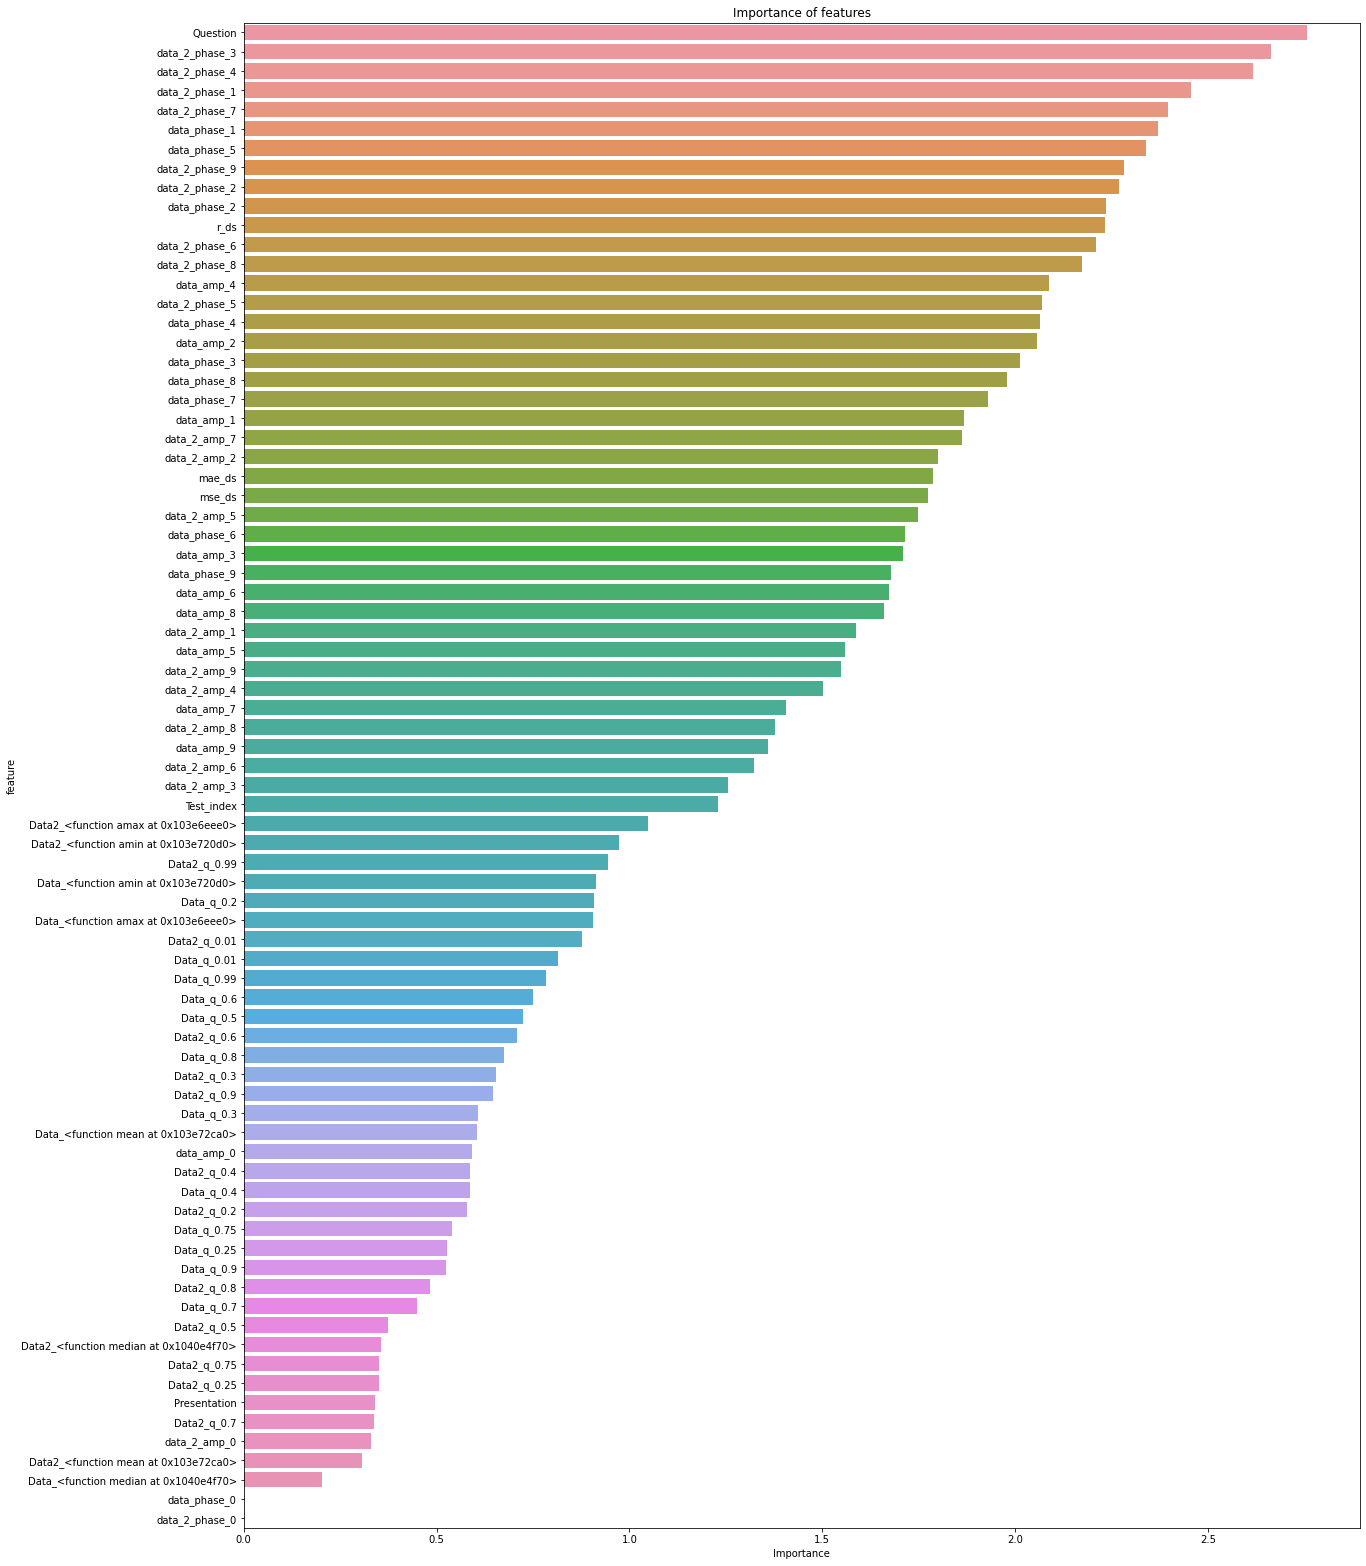

['Question', 'data_2_phase_3', 'data_2_phase_4', 'data_2_phase_1', 'data_2_phase_7', 'data_phase_1', 'data_phase_5', 'data_2_phase_9', 'data_2_phase_2', 'data_phase_2', 'r_ds', 'data_2_phase_6', 'data_2_phase_8', 'data_amp_4', 'data_2_phase_5']


In [31]:
important_features_top = show_feature_importances(X_train.columns, classifier.feature_importances_, get_top=15)
print(important_features_top)